In [26]:
from tensorflow import keras
model = keras.models.load_model('./ML_stuff/jeff_model') #./Milestone_1/trained_model_fold4.h5

from numpy import genfromtxt
data = genfromtxt('./ML_stuff/input.csv', delimiter=',')

In [29]:
import numpy as np

data = data[np.random.choice(data.shape[0], 500, replace=False)]
X = data.transpose()[:-1].transpose()

values = data.transpose()[-1].astype(int)
n_values = np.max(values) + 1
y = np.eye(n_values)[values]

print(X.shape)
print(y.shape)

(500, 300)
(500, 9)


In [31]:
import tensorflow as tf
prediction = model.predict(X)

m = tf.keras.metrics.CategoricalAccuracy(name="categorical_accuracy", dtype=None)
m.update_state(prediction, y)
print(m.result().numpy())

0.986


In [33]:
model.summary()
num_of_layers = len(model.layers)

weights = []
bias = []
activation = []
for layer in model.layers:
    if 'conv2d' in layer.get_config()['name']:
        w, b = layer.get_weights()
        print(w.shape)
        print(b.shape)
        continue
    if 'activation' in layer.get_config()['name']:
        continue
    if 'flatten' in layer.get_config()['name']:
        continue
    if 'dropout' in layer.get_config()['name']:
        continue
    w, b = layer.get_weights()
    activation.append(layer.get_config()['activation'])
    weights.append(w)
    bias.append(b)


Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 128)               38528     
_________________________________________________________________
dense_124 (Dense)            (None, 32)                4128      
_________________________________________________________________
dense_125 (Dense)            (None, 9)                 297       
Total params: 42,953
Trainable params: 42,953
Non-trainable params: 0
_________________________________________________________________
[ 0.00786078  0.24179345  0.16351333 -0.01547752 -0.00814214 -0.07526322
 -0.01191895 -0.00955294 -0.00895992 -0.07435301 -0.0081785   0.05181692
 -0.16312914 -0.05210665 -0.00510634  0.32351705 -0.16133392 -0.16247587
  0.21837536 -0.1490463  -0.00513944  0.14626183  0.04790089  0.07702033
  0.01191748 -0.00769351 -0.10057472  0.08642098 -0.18976866  0.05589047
  0.35513613  

In [6]:
#Verify understanding of model weights, bias & activation function 
software_prediction = []    

def dot_product(a, b, n):
    total = []
    for i in range(0, b.shape[1]):
        s = 0
        for j in range(0, n):
            s += a[j] * b[j][i]
        total.append(s)
    return total

def add(a, b, n):
    total = []
    for i in range(0, n):
        total.append(a[i] + b[i])
    return total

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

#minmax = [[float('inf'), float('-inf')] for x in range(0, num_of_layers)]

for line in X:
    in_data = line
    for i in range(0, num_of_layers):
#       minmax[i][0] = min(min(in_data), minmax[i][0])
#        minmax[i][1] = max(max(in_data), minmax[i][1])
        pdt = np.matmul(in_data, weights[i], dtype=np.float32)
        in_data = add(pdt, bias[i], len(bias[i]))
        if activation[i] == 'relu':
            in_data = tf.keras.activations.relu(in_data)
        elif activation[i] == 'softmax':
            in_data = softmax(in_data)
    software_prediction.append(in_data)

software_prediction = np.array(software_prediction)
m.update_state(prediction, software_prediction)
print(m.result().numpy())
m.update_state(software_prediction, y)
print(m.result().numpy())
print(minmax)

0.998
0.99733335
[[0.0, 1.0], [<tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=20.185328>], [<tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=77.4887>]]


In [153]:
np.set_printoptions(suppress=True)
for i in range(0, len(prediction)):
    # absolute tolerance up to 1e-06
    if not np.isclose(prediction[i], software_prediction[i], rtol=1e-05, atol=1e-06, equal_nan=False).all():
        print(prediction[i])
        print(software_prediction[i])

In [43]:
minimum = float('inf')
maximum = float('-inf')
i = 2
s = '{'
for x in bias[i]:
    s = s + ' ' + str(int(255 * x)) + ','
s = s[:-1] + '}'
print(s)
for j in range(0, weights[i].shape[1]):
    s = '{'
    for k in range(0, weights[i].shape[0]):
        s = s + ' ' + str(int(weights[i][k][j] * 255)) + ','
    s = s[:-1] + '},\n'
    #print(s)

 136, 148, 80, 52, 68, -172, 69, 49, 133, -795, -37, 36, 5, 31, -412, -114, 15, 79, -131, -149, -64, 154, -201, -556, -176, 61, 257, 21, -116, 5, -23, 143, \
 144, 56, -72, 189, 34, 46, -25, -33, -214, -96, -54, -136, 108, 73, 182, 17, 31, -23, -36, -110, -254, 33, 171, 60, 19, -432, -79, 77, 25, -87, 7, -279, \
 102, 70, -78, 73, -242, 164, -17, -101, 146, 141, -32, 4, -177, -103, -90, 29, 206, -209, -72, -4, -364, -514, -93, -69, 100, 25, -179, 30, -29, 50, 130, -253, \
 -196, -157, -65, -305, -235, -59, -177, 61, 114, -46, -15, 101, -112, 199, -155, 22, 54, 2, -73, 76, 142, 145, -493, -643, -108, -3, -486, -86, 235, 16, -43, -22, \
 57, 60, 67, -109, 172, 86, 162, 2, -152, 109, 6, -17, -397, 57, 115, -16, -221, 3, 49, 58, 28, 25, -308, -48, -105, 125, -366, -2, -40, -92, -121, -77, \
 241, 35, 14, -69, -290, -81, -101, 4, -65, 28, 79, -190, 165, 258, -396, -146, -174, -137, 6, -29, 119, -155, 128, 36, 126, -44, -427, -73, -610, -44, 75, 77, \
 -264, -3, 52, -33, -31, 100, -40, 77, -

In [2]:
!pip uninstall -y tensorflow
!pip install -q tf-nightly
!pip install -q tensorflow-model-optimization

Found existing installation: tensorflow 2.4.1
Uninstalling tensorflow-2.4.1:
  Successfully uninstalled tensorflow-2.4.1


In [2]:
from tensorflow import keras
model = keras.models.load_model('./ML_stuff/jeff_model')

from numpy import genfromtxt
data = genfromtxt('./ML_stuff/input.csv', delimiter=',')
from keras.utils import to_categorical
import numpy as np

X = data.transpose()[:-1].transpose()
y = to_categorical(data.transpose()[-1])
print(X.shape)
print(y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

(19194, 300)
(19194, 9)


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model

# q_aware stands for for quantization aware.
model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'],)
q_aware_model = quantize_model(model)

# `quantize_model` requires a recompile.
q_aware_model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

q_aware_model.summary()

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=50, batch_size=64)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
quantize_layer_1 (QuantizeLa (None, 300)               3         
_________________________________________________________________
quant_dense_3 (QuantizeWrapp (None, 128)               38533     
_________________________________________________________________
quant_dense_4 (QuantizeWrapp (None, 32)                4133      
_________________________________________________________________
quant_dense_5 (QuantizeWrapp (None, 9)                 302       
Total params: 42,971
Trainable params: 42,953
Non-trainable params: 18
_________________________________________________________________
Epoch 1/50
240/240 [==============================] - 2s 5ms/step - loss: 1.7646 - accuracy: 0.3655 - val_loss: 1.2533 - val_accuracy: 0.5270
Epoch 2/50
240/240 [==============================] - 1s 3ms/step - loss: 1.1669 - accuracy: 0.5496 - val

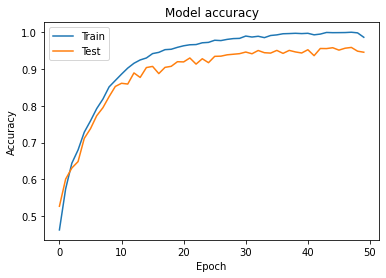

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
q_aware_model.summary()
num_of_layers = len(model.layers)

weights = []
bias = []
activation = []
for layer in q_aware_model.layers:
    print(layer.get_config())
    w = layer.get_weights()
    print(w)
    #activation.append(layer.get_config()['activation'])
    #weights.append(w)
#bias.append(b)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
quantize_layer_1 (QuantizeLa (None, 300)               3         
_________________________________________________________________
quant_dense_3 (QuantizeWrapp (None, 128)               38533     
_________________________________________________________________
quant_dense_4 (QuantizeWrapp (None, 32)                4133      
_________________________________________________________________
quant_dense_5 (QuantizeWrapp (None, 9)                 302       
Total params: 42,971
Trainable params: 42,953
Non-trainable params: 18
_________________________________________________________________
{'name': 'quantize_layer_1', 'trainable': True, 'dtype': 'float32', 'quantizer': {'class_name': 'AllValuesQuantizer', 'config': {'num_bits': 8, 'per_axis': False, 'symmetric': False, 'narrow_range': False}}}
[0.0, 0.0, -1]
{'name': 'quant_dense_3'

In [52]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

quantized_tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\jeffe\AppData\Local\Temp\tmpwxvgvbu5\assets


INFO:tensorflow:Assets written to: C:\Users\jeffe\AppData\Local\Temp\tmpwxvgvbu5\assets


In [53]:
interpreter = tf.lite.Interpreter(model_content=quantized_tflite_model)
#interpreter.allocate_tensors()
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

input:  <class 'numpy.float32'>
output:  <class 'numpy.float32'>


In [54]:
interpreter.get_tensor_details()

[{'name': 'dense_3_input',
  'index': 0,
  'shape': array([  1, 300]),
  'shape_signature': array([ -1, 300]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'sequential_1/quantize_layer_1/AllValuesQuantize/FakeQuantWithMinMaxVars;sequential_1/quantize_layer_1/AllValuesQuantize/FakeQuantWithMinMaxVars/ReadVariableOp_1/resource',
  'index': 1,
  'shape': array([  1, 300]),
  'shape_signature': array([ -1, 300]),
  'dtype': numpy.int8,
  'quantization': (3.921568847431445e-09, -1),
  'quantization_parameters': {'scales': array([0.], dtype=float32),
   'zero_points': array([-1]),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'sequential_1/quant_dense_3/MatMul;sequential_1/quant_dense_3/LastValueQuant/FakeQuantWithMinMaxVars',
  'index': 2,
  'shape': array([128, 300]),
  'shape_signa

In [69]:
for layer in interpreter.get_tensor_details():
    # to store layer's metadata in group's metadata
    print(layer['name'])
    print(layer['shape'])
    # grp.attrs["dtype"] = all_layers_details[i]['dtype']
    print(layer['quantization'])

    try:
        x = interpreter.get_tensor(layer['index'])
        print(np.array2string(x, formatter={'float_kind':lambda x: "%.2f" % x}))
    except ValueError:
           pass


dense_3_input
[  1 300]
(0.0, 0)
sequential_1/quantize_layer_1/AllValuesQuantize/FakeQuantWithMinMaxVars;sequential_1/quantize_layer_1/AllValuesQuantize/FakeQuantWithMinMaxVars/ReadVariableOp_1/resource
[  1 300]
(3.921568847431445e-09, -1)
sequential_1/quant_dense_3/MatMul;sequential_1/quant_dense_3/LastValueQuant/FakeQuantWithMinMaxVars
[128 300]
(0.04724409431219101, 0)
[[-2 -2  2 ... -1  1 -2]
 [ 0 -1 -2 ... -1  0  1]
 [ 1  2 -1 ...  0 -2  2]
 ...
 [-1  1 -1 ...  2  2  0]
 [ 2  0  1 ...  0 -2 -2]
 [ 2  2  0 ...  0 -1 -2]]
sequential_1/quant_dense_3/MatMul;sequential_1/quant_dense_3/Relu;sequential_1/quant_dense_3/BiasAdd
[  1 128]
(0.0470588244497776, 0)
sequential_1/quant_dense_4/MatMul;sequential_1/quant_dense_4/LastValueQuant/FakeQuantWithMinMaxVars
[ 32 128]
(0.04724409431219101, 0)
[[ 0  3 -2 ...  3  4  2]
 [ 4 -2 -1 ...  2 -1  2]
 [ 2 -4 -1 ... -2 -1 -2]
 ...
 [ 4  3  1 ... -3  2  3]
 [ 1 -1  0 ...  4 -3  0]
 [ 1 -1  3 ...  3 -3  1]]
sequential_1/quant_dense_4/MatMul;sequenti

In [71]:
interpreter.allocate_tensors()
for layer in interpreter.get_tensor_details():
    # to store layer's metadata in group's metadata
    print(layer['name'])
    print(layer['shape'])
    # grp.attrs["dtype"] = all_layers_details[i]['dtype']
    print(layer['quantization'])

    try:
        x = interpreter.get_tensor(layer['index'])
        print(np.array2string(x, formatter={'float_kind':lambda x: "%.2f" % x}))
    except ValueError:
           pass

dense_3_input
[  1 300]
(0.0, 0)
[[0.00 0.00 0.00 0.00 0.00 0.00 nan nan 0.00
  45865672592639313129451570576947675136.00 14660303127378680281563136.00
  14274142130452184432640.00 0.00 1090262563567962203967455232.00 0.00
  0.00 269072133705621831680.00 2218514972672.00 0.00
  302625243599930827651623682048.00 0.00 0.00 0.00
  70975523162658881667072.00 0.00 0.00 0.00 0.00 0.00 0.00
  10259322674239835734016.00 16245716408460115968.00
  4689377801507748948350074880.00 0.00 18319372764645100982632448.00 0.00
  210960.28 0.00 0.00 215.28 206.02 10960498665481947862188699942912.00
  228382216625445666816.00 265441172904574418789017313083392.00
  268754910969856.00 243746448.00 236846151582949048320.00
  4463274336913116347489671184384.00 0.00
  295137591530954238550853287936.00 0.00 0.00
  18060448592452711050463150080.00 0.00 273256083312565288960.00 0.00
  41792617530109042135689854976.00 304812811342137791392577012891648.00
  0.00 0.00 17110703305543122944.00 1936428605424206183869994